
# Heatmap Examples


In [9]:

import scgenome
import matplotlib.pyplot as plt

adata = scgenome.datasets.OV2295_HMMCopy_reduced()


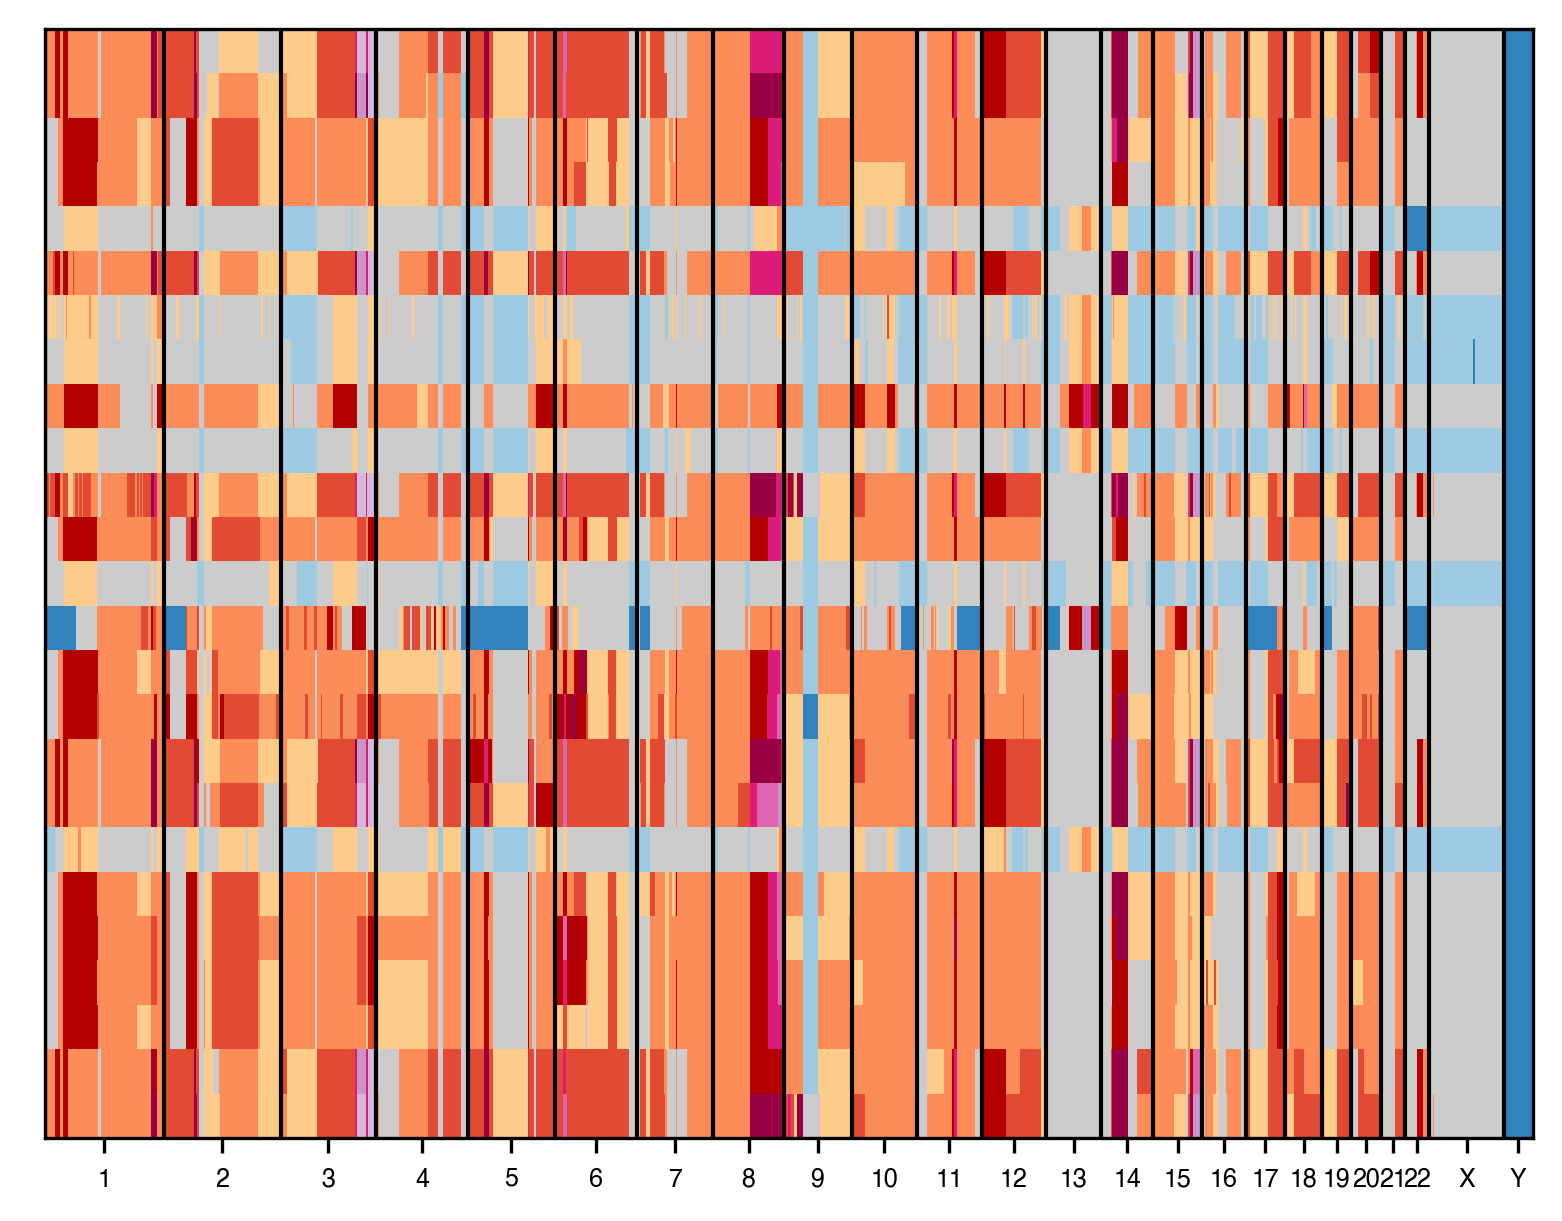

In [10]:

g = scgenome.pl.plot_cell_cn_matrix(adata)



## Cell order

Cells can be ordered in a heatmap by specifying any set of one or more fields from `.obs`.  A legend can be added to a specific matplotlib axis, either the heatmap axis or a distinct axis to allow for flexible positioning of the legend.


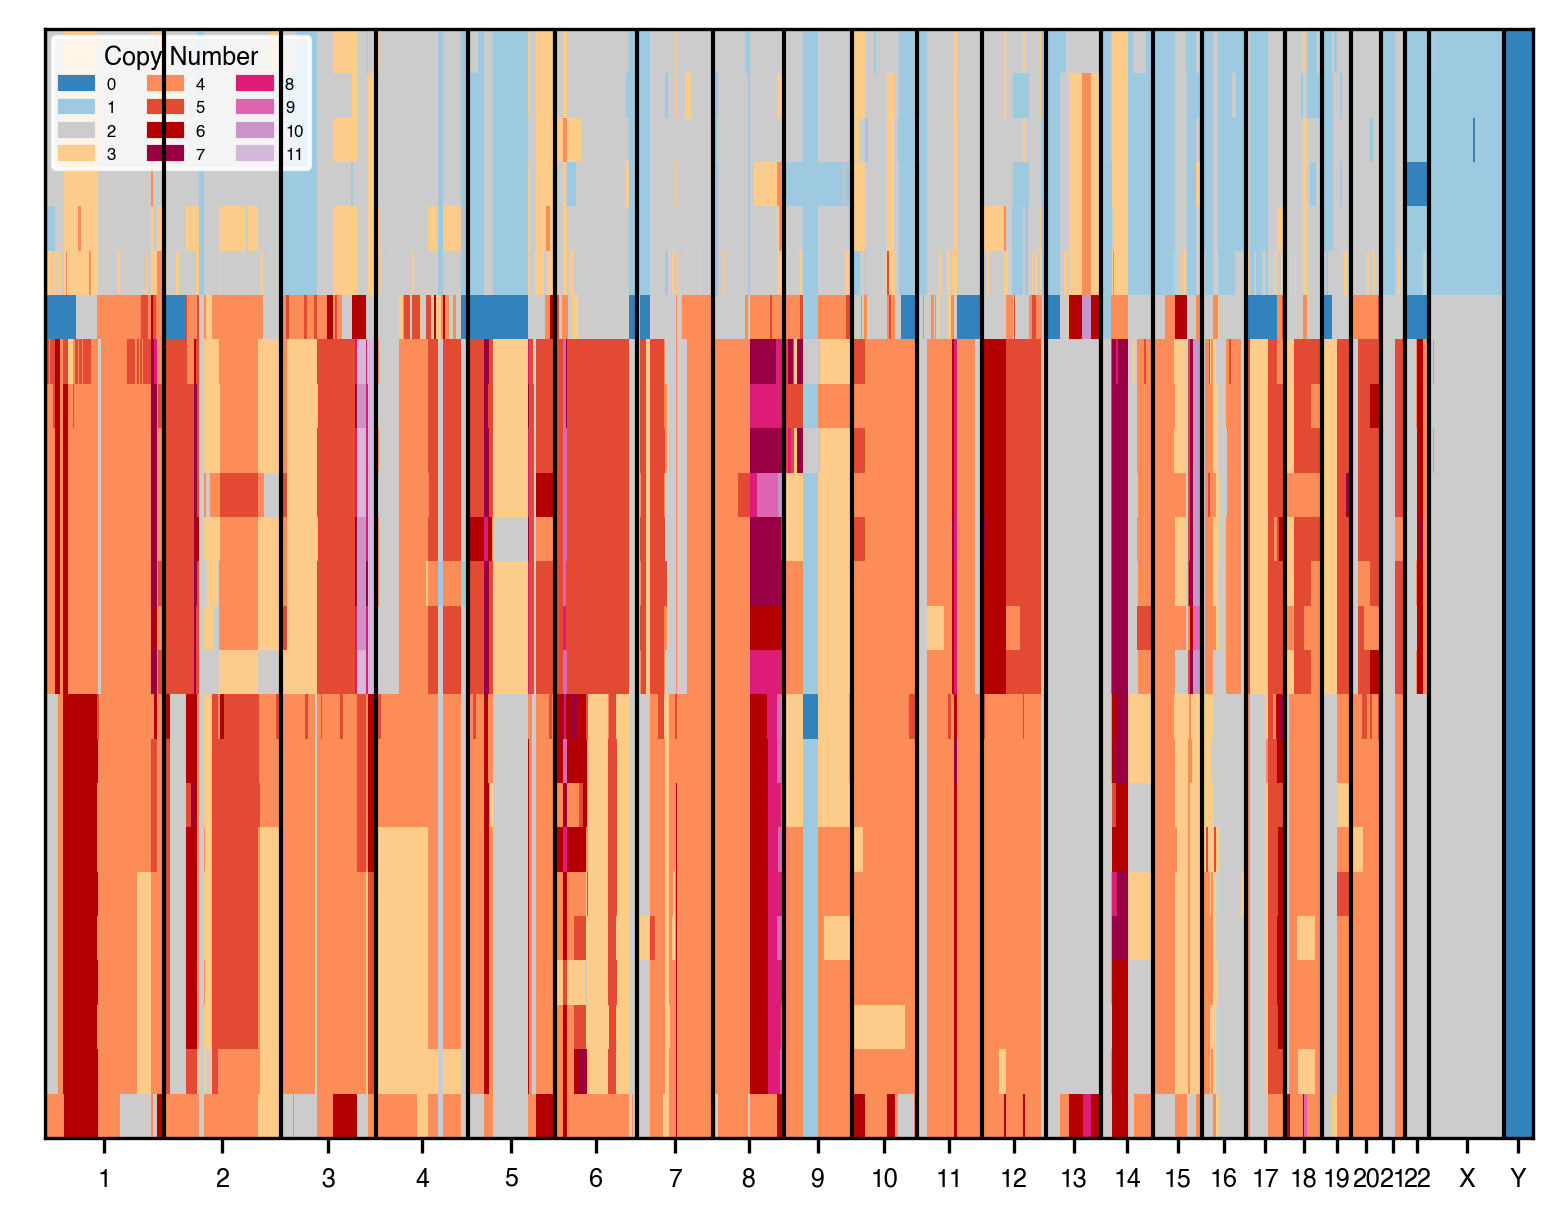

In [11]:

g = scgenome.pl.plot_cell_cn_matrix(
    adata,
    cell_order_fields=['cell_order'],
    ax_legend=plt.gca())



## Cell annotations

Cells can annotated with any field from `.obs`.  Categorical fields will be given a discrete color map.  Real valued fields will be given a continuous color map.


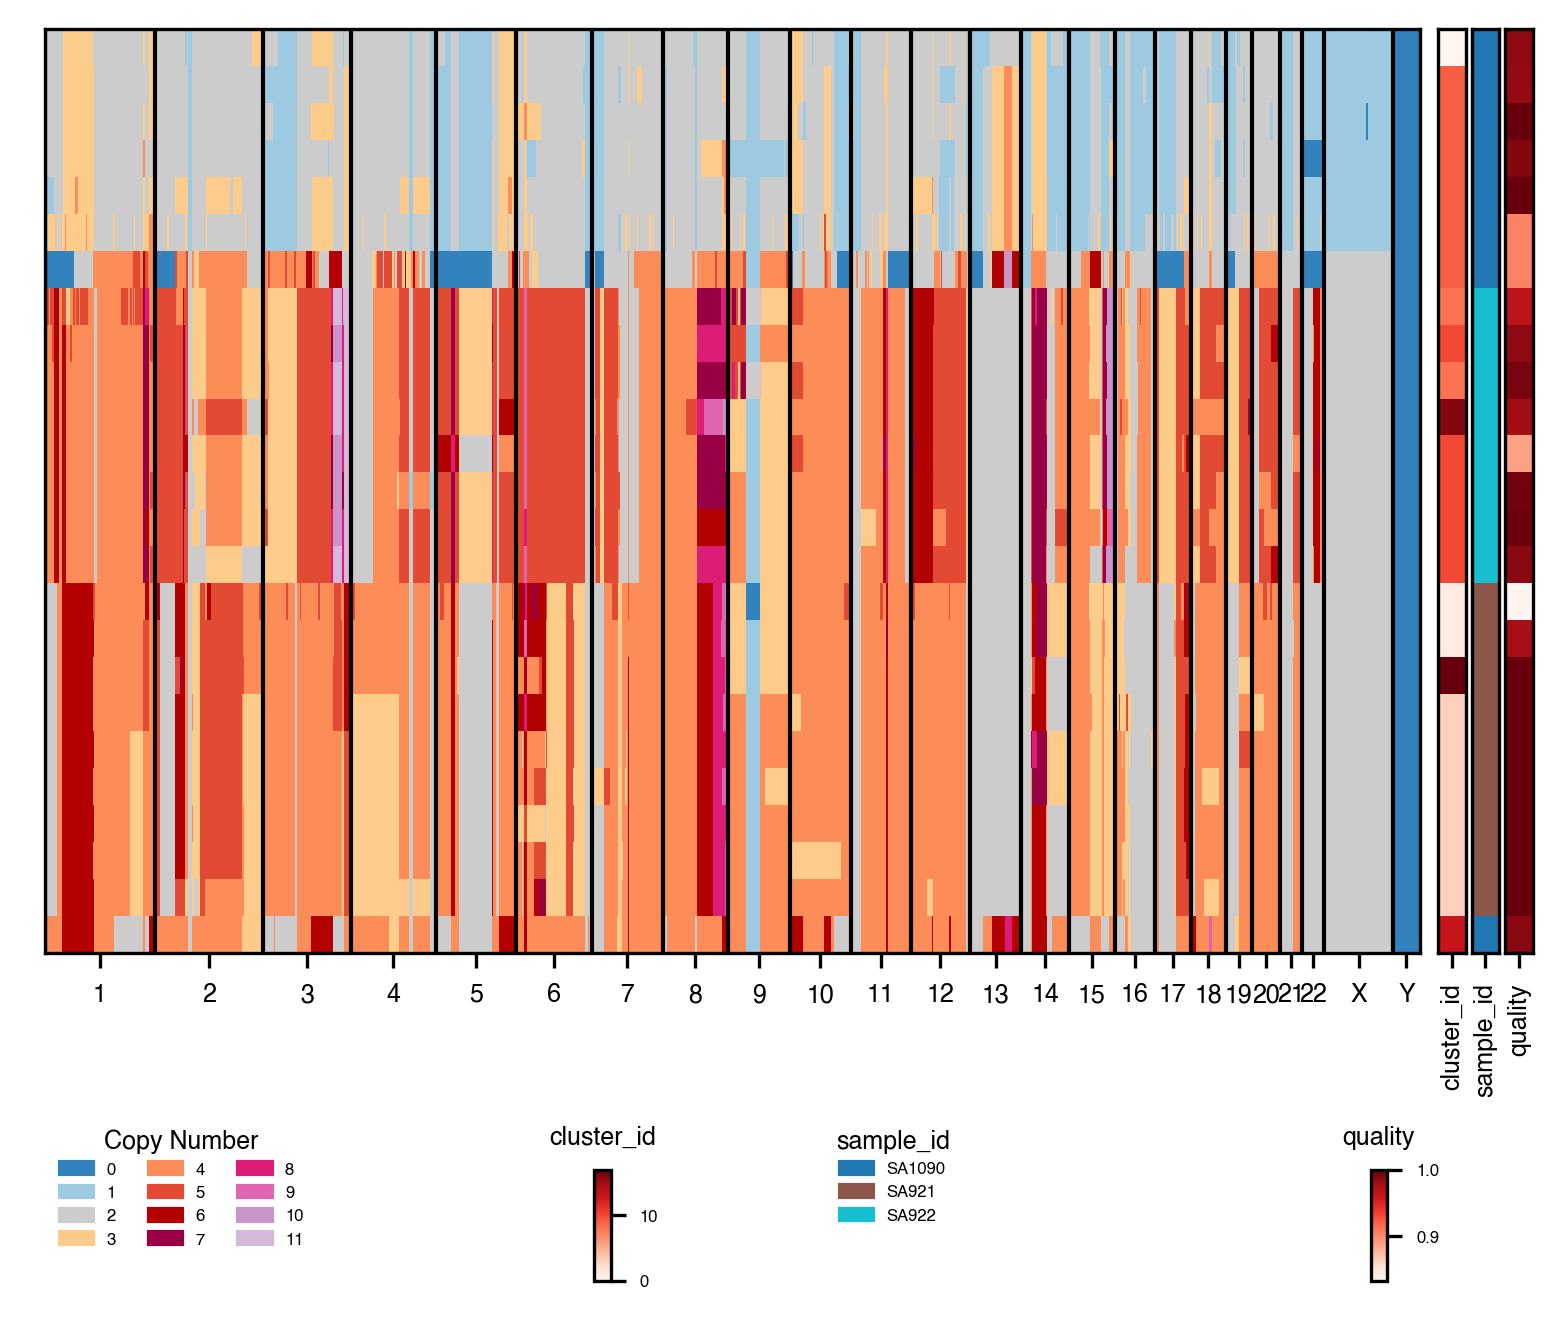

In [12]:

g = scgenome.pl.plot_cell_cn_matrix_clusters_fig(
    adata,
    cell_order_fields=['cell_order'],
    annotation_fields=['cluster_id', 'sample_id', 'quality'])



## Irregular bin widths

Irregular bin widths will result in an irregular heatmap.  The `scgenome.tl.rebin_regular` function can be used to rebin data into a consistent bin widths before generating a heatmap.


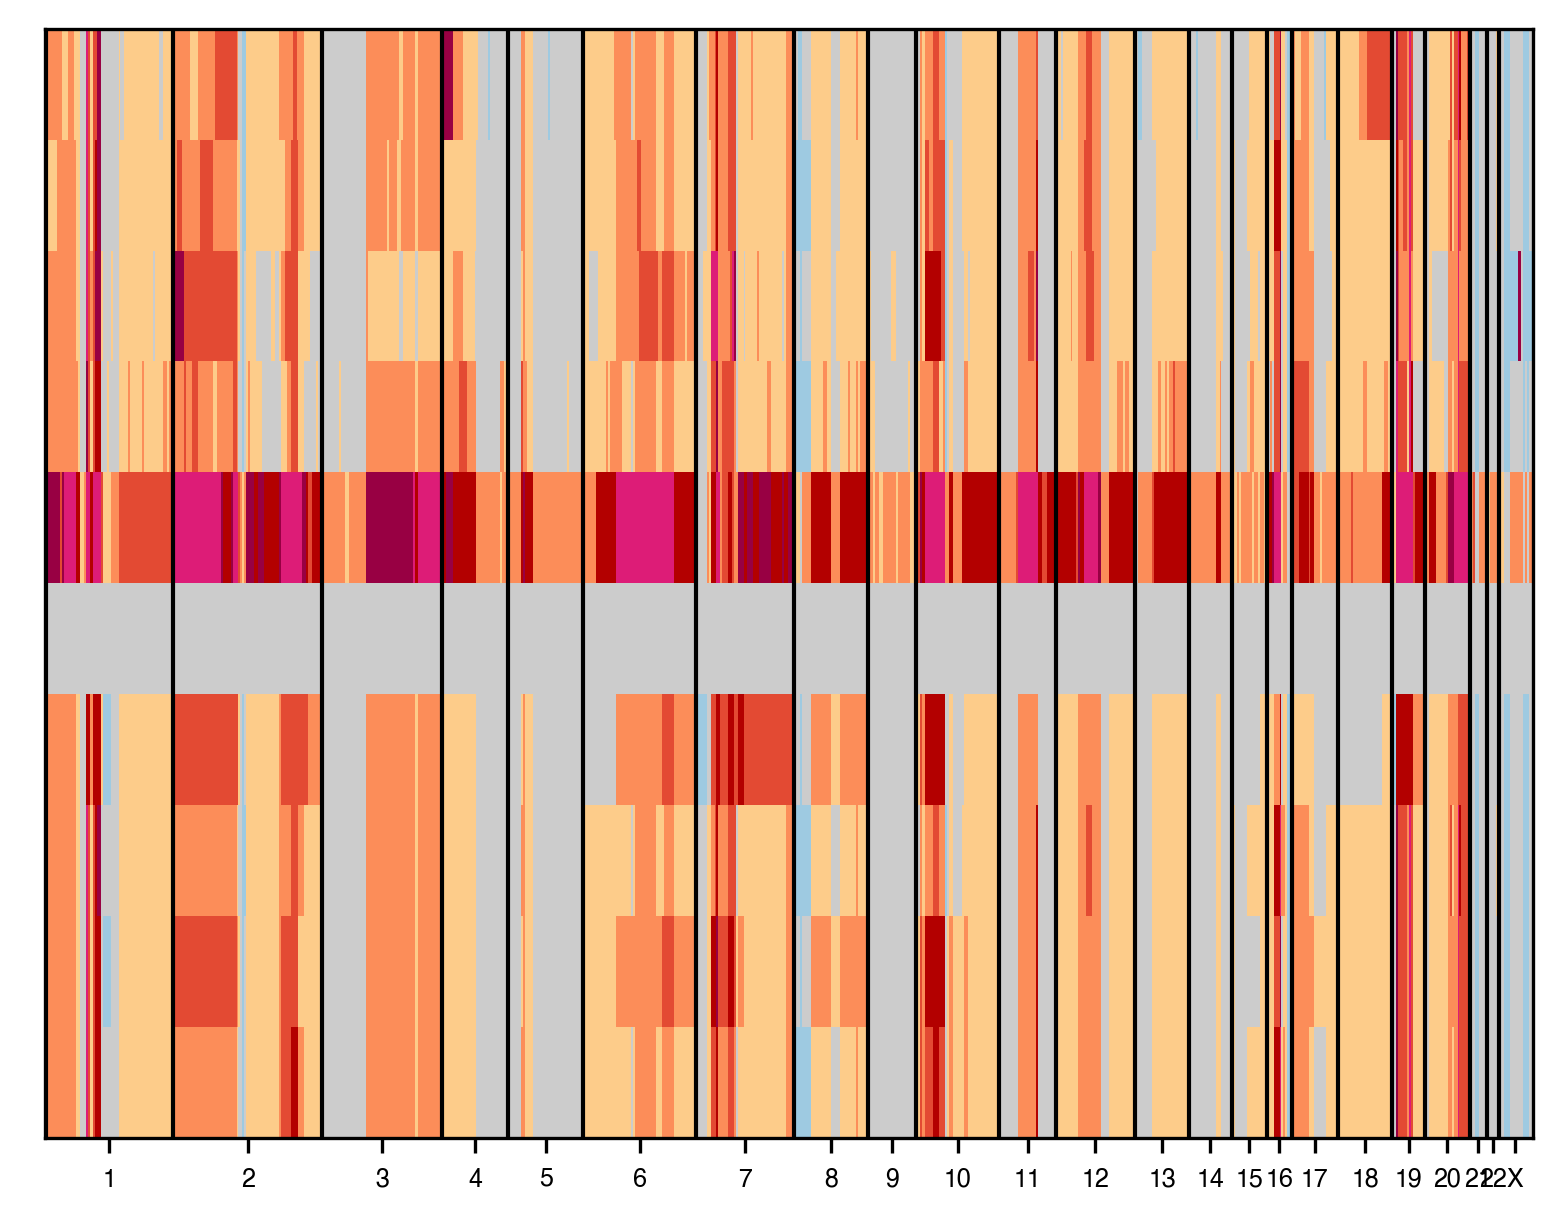

In [13]:

adata_irregular = scgenome.datasets.OV_051_Medicc2_reduced()

plt.figure()
g = scgenome.pl.plot_cell_cn_matrix(adata_irregular, layer_name=None)


/Users/mcphera1/Projects/scgenome/scgenome/tools/ranges.py:242: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


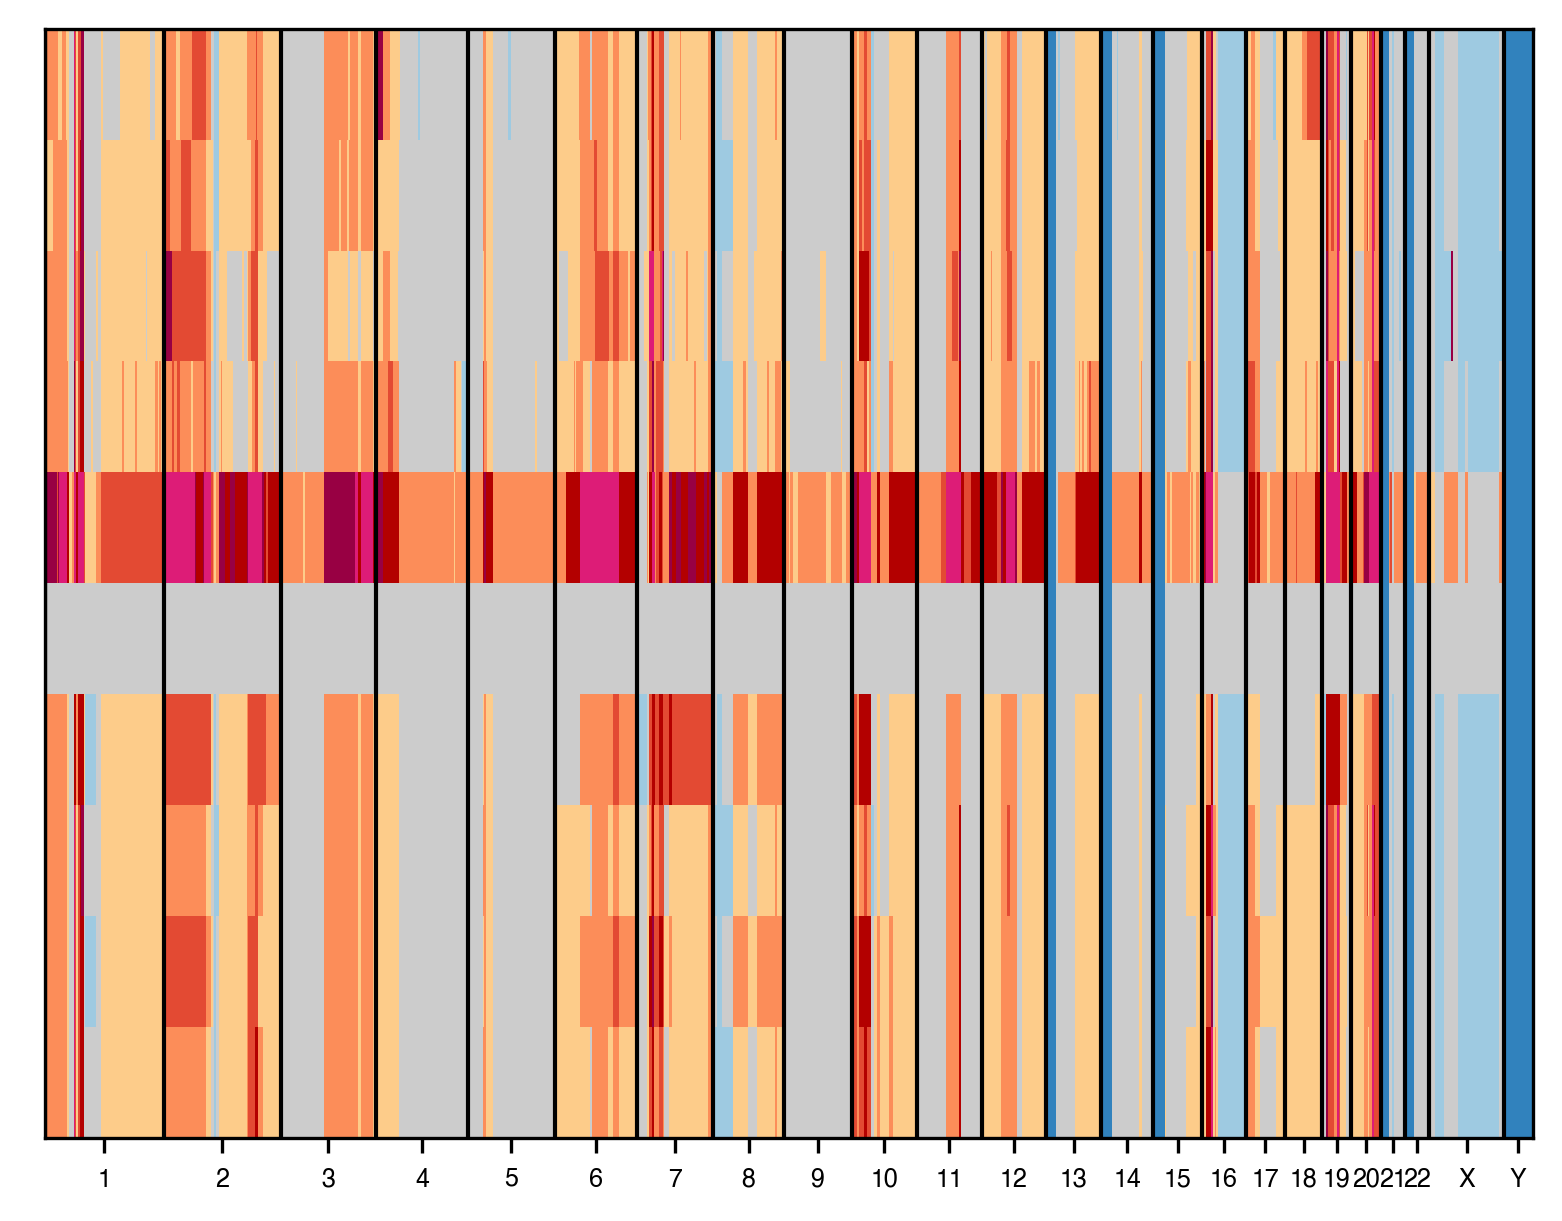

In [14]:

adata_regular = scgenome.tl.rebin_regular(
    adata_irregular, 500000, outer_join=True, agg_X=scgenome.tl.bin_width_weighted_mean, agg_layers={},
    agg_var={'is_normal': ('is_normal', scgenome.tl.bin_width_weighted_mean)})

g = scgenome.pl.plot_cell_cn_matrix(adata_regular, layer_name=None)
